This script do:

- add features
   - test data info
       - category in most_freq_hours_in_test_data = `[4,5,9,10,13,14]` , least_freq_hours_in_test_data = `[6,11,15]` or others
   - mean encode 
       - ~~by (ip,app)~~
       - ~~by (app,channel)~~
       - ~~os_mean_target~~
       - ~~device_mean_target~~
          
   - base
       
       - cnt
           - count by (ip,app,os,channel,day,hour) : device_cnt_ip_app_os_channel_day_hour
           - cnt by (ip,app,os) : channel_cnt_ip_app_os
           
           - **cnt by (ip,device) : channel_cnt_ip_device **
           - **cnt by (app,channel) : device_cnt_app_channel **
           - **cnt by (ip) : channel_cnt_ip **
       - cumcnt
           - ~~cumcnt os by (ip) : os_cumcnt_ip~~
       - unique
           - hour by (ip,day) : hour_nunique_ip_day
           - os by (ip,app) : os_nunique_ip_app
           - device by (ip) : device_nunique_ip
           - ~~app_nunique_channel~~
           - ~~ip_nunique_channel~~
   - shift 
       - shift_iptcnt 
       - (mean of device_cnt_ip_app_os_channel by hour)
   - next click
       - ~~by ip,os,device (iod)~~
       - ~~by ip,os,device,channel (iodc)~~
       - ~~by app,device,channel (adc)~~
       - ~~by device,channel (dc)~~
       - by ip,app (ia)
       - by ip,app,device,os,channel (iadoc)
- features base
    - use only (gain importance)
        - os_mean_target
        - hour_mean_target    
        - ip_unicnt_channel
        
        - app_mean_target
        - app
        - channel_mean_target
        - next_click_dt
        - channel_nunique_ip
        - os
        - channel
        - hour        
        - app_nunique_channel
        - channel_cnt_ip_app
        - hour_nunique_day_ip
        - app_nunique_ip
        - app_nunique_ip_device_os
        - device_mean_target 	
        - channel_cnt_ip_day_hour
        - app_cumcnt_ip_device_os
        - ip_mean_target        
        - device

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import pytz
%matplotlib inline 
import gc,time

In [2]:
with pd.HDFStore('../input/feat/feat65_trn_day8_val_day9.h5') as store:
    print(store.keys())
    test_df = store['test_df']
    train_df = store['train_df']
    val_df = store['valid_df']

['/test_df', '/train_df', '/valid_df']


In [3]:
trn_df = train_df.append(val_df)
trn_df = trn_df.append(test_df)
del train_df,test_df,val_df;gc.collect()

14

drop 
- ~~app_nunique_channel~~
- ~~os_mean_target~~
- ~~ip_nunique_channel~~
- ~~device_mean_target~~

In [5]:
trn_df.drop(['next_click_iodc','next_click_dt_iod','next_click_dt_adc'],axis=1,inplace=True)

In [4]:
# trn_df.drop(['ip_app_mean_target','app_channel_mean_target'],inplace=True,axis=1)

In [4]:
# trn_df.drop(['next_click_dt_dc','os_cumcnt_ip'],axis=1,inplace=True) #  drop in 64

In [4]:
# trn_df.drop(['app_nunique_channel','os_mean_target','ip_nunique_channel','device_mean_target'],inplace=True,axis=1)

In [6]:
trn_df.columns

Index(['app', 'app_cumcnt_ip_device_os', 'app_mean_target', 'app_nunique_ip',
       'app_nunique_ip_device_os', 'channel', 'channel_cnt_ip_app',
       'channel_cnt_ip_day_hour', 'channel_mean_target', 'channel_nunique_ip',
       'click_id', 'click_time', 'day', 'device', 'hour', 'hour_mean_target',
       'ip', 'ip_mean_target', 'is_attributed', 'next_click_dt', 'os',
       'device_cnt_ip_app_os_channel_day_hour', 'channel_cnt_ip_app_os',
       'hour_nunique_ip_day', 'os_nunique_ip_app', 'device_nunique_ip',
       'shift_iptcnt', 'next_click_dt_ia', 'next_click_iodac'],
      dtype='object')

In [7]:
gc.collect()

7

____

- len_trn  : 125193591 

- len_tst  : 18790469

## do shift
- previous count by hour 
    - (ip,day,hour)
    - 

In [7]:
# trn_df[['ip','day','hour','channel_cnt_ip_day_hour']]
gp = trn_df.groupby(['ip','day','hour']).size().rename('ip_tcnt').reset_index()
gp['shift_iptcnt'] = gp.groupby(['ip','day']).shift(1).ip_tcnt
gp.head()


,ip,day,hour,ip_tcnt,shift_iptcnt
0,0,10,12,2,NaN
1,1,9,1,5,NaN
2,1,9,3,2,5.0
3,1,9,4,4,2.0
4,1,9,6,4,4.0


In [15]:
mask = (gp.ip == 5348) & (gp.day==8)
gp[mask].head()

,ip,day,hour,ip_tcnt,shift_iptcnt
62654,5348,8,0,22808,NaN
62655,5348,8,1,11422,22808.0
62656,5348,8,2,6530,11422.0
62657,5348,8,3,5108,6530.0
62658,5348,8,4,4814,5108.0


In [16]:
trn_df = trn_df.merge(gp[['ip','day','hour','shift_iptcnt']],how='left',on=['ip','day','hour'])

In [38]:
trn_df['shift_iptcnt'] = trn_df.shift_iptcnt.fillna(0).astype('uint16')

In [39]:
gc.collect()

120

In [40]:
trn_df.columns

Index(['app', 'app_cumcnt_ip_device_os', 'app_mean_target', 'app_nunique_ip',
       'app_nunique_ip_device_os', 'channel', 'channel_cnt_ip_app',
       'channel_cnt_ip_day_hour', 'channel_mean_target', 'channel_nunique_ip',
       'click_id', 'click_time', 'day', 'device', 'hour', 'hour_mean_target',
       'ip', 'ip_mean_target', 'is_attributed', 'next_click_dt', 'os',
       'device_cnt_ip_app_os_channel_day_hour', 'channel_cnt_ip_app_os',
       'os_cumcnt_ip', 'hour_nunique_ip_day', 'os_nunique_ip_app',
       'device_nunique_ip', 'shift_iptcnt'],
      dtype='object')

## Next click 
- ~~by (ip,os,device)~~
- ~~by (app,device,channel)~~
- ~~by (device, channel)~~
- by (ip,app)

- ~~by ip,os,device,channel (iodc)~~
- by ip,device,app,os,channel (iodac)

In [25]:
def do_next_click(data, gb):
    buffer = pd.DataFrame()
#     buffer['click_time'] = data.click_time
    
    print('groupby: ',gb)
    gp = data.groupby(gb)
    print('doing shift1...')    
    buffer['shift_1'] = gp.click_time.shift(-1)
    cst = pytz.timezone('Asia/Shanghai')
    buffer['shift_1'] = pd.to_datetime(buffer['shift_1']).dt.tz_localize(pytz.utc).dt.tz_convert(cst) 
    buffer['next_click_'+''.join([e[0] for e in gb])] = ((buffer.shift_1 - data.click_time) / np.timedelta64(1,'s')).fillna(50000).astype('uint16')
    print('next_click_dt added')

    print('gc...')
    buffer.drop(['shift_1'],axis=1,inplace=True)
    gc.collect()
    print('complete')
    
    return buffer.values

In [24]:
trn_df.columns

Index(['app', 'app_cumcnt_ip_device_os', 'app_mean_target', 'app_nunique_ip',
       'app_nunique_ip_device_os', 'channel', 'channel_cnt_ip_app',
       'channel_cnt_ip_day_hour', 'channel_mean_target', 'channel_nunique_ip',
       'click_id', 'click_time', 'day', 'device', 'hour', 'hour_mean_target',
       'ip', 'ip_mean_target', 'is_attributed', 'next_click_dt', 'os',
       'device_cnt_ip_app_os_channel_day_hour', 'channel_cnt_ip_app_os',
       'hour_nunique_ip_day', 'os_nunique_ip_app', 'device_nunique_ip',
       'shift_iptcnt', 'next_click_dt_iod', 'next_click_dt_adc',
       'next_click_dt_ia'],
      dtype='object')

In [33]:
trn_df['next_click_iodc'] = do_next_click(trn_df,['ip','device','os','channel'])

groupby:  ['ip', 'device', 'os', 'channel']
doing shift1...
next_click_dt_iod added
gc...
complete


In [34]:
trn_df['next_click_iodac'] = do_next_click(trn_df,['ip','os','device','app','channel'])

groupby:  ['ip', 'os', 'device', 'app', 'channel']
doing shift1...
next_click_dt_iod added
gc...
complete


___ 

copy and paste to genreate next click time feat

In [45]:
# print('next click time by(ip,os,device)...')
# gp = trn_df.groupby(['ip','os','device'])
# print('shift 1...')

# trn_df['shift_1'] = gp.click_time.shift(-1)
# cst = pytz.timezone('Asia/Shanghai')
# trn_df['shift_1'] = pd.to_datetime(trn_df['shift_1']).dt.tz_localize(pytz.utc).dt.tz_convert(cst) 
# trn_df['next_click_dt_iod'] = ((trn_df.shift_1 - trn_df.click_time) / np.timedelta64(1,'s')).fillna(50000).astype('uint16')
# print('next_click_dt_iod added')

# print('gc...')
# trn_df.drop(['shift_1'],axis=1,inplace=True)
# gc.collect()
# print('complete')

next click time by(ip,os,device)...
shift 1...
next_click_dt_iod added
gc...
complete


In [7]:
# print('next click time by(app,device,channel)...')
# gp = trn_df.groupby(['app','device','channel'])
# print('shift 1...')

# trn_df['shift_1'] = gp.click_time.shift(-1)
# cst = pytz.timezone('Asia/Shanghai')
# trn_df['shift_1'] = pd.to_datetime(trn_df['shift_1']).dt.tz_localize(pytz.utc).dt.tz_convert(cst) 
# trn_df['next_click_dt_adc'] = ((trn_df.shift_1 - trn_df.click_time) / np.timedelta64(1,'s')).fillna(50000).astype('uint16')
# print('next_click_dt_adc added')

# print('gc...')
# trn_df.drop(['shift_1'],axis=1,inplace=True)
# gc.collect()
# print('complete')

next click time by(ip,os,device)...
shift 1...
next_click_dt_adc added
gc...
complete


In [8]:
# print('next click time by(device,channel)...')
# gp = trn_df.groupby(['device','channel'])
# print('shift 1...')

# trn_df['shift_1'] = gp.click_time.shift(-1)
# cst = pytz.timezone('Asia/Shanghai')
# trn_df['shift_1'] = pd.to_datetime(trn_df['shift_1']).dt.tz_localize(pytz.utc).dt.tz_convert(cst) 
# trn_df['next_click_dt_dc'] = ((trn_df.shift_1 - trn_df.click_time) / np.timedelta64(1,'s')).fillna(50000).astype('uint16')
# print('next_click_dt_dc added')

# print('gc...')
# trn_df.drop(['shift_1'],axis=1,inplace=True)
# gc.collect()
# print('complete')

next click time by(device,channel)...
shift 1...
next_click_dt_dc added
gc...
complete


In [9]:
# print('next click time by (ip,app)...')
# gp = trn_df.groupby(['ip','app'])
# print('shift 1...')

# trn_df['shift_1'] = gp.click_time.shift(-1)
# cst = pytz.timezone('Asia/Shanghai')
# trn_df['shift_1'] = pd.to_datetime(trn_df['shift_1']).dt.tz_localize(pytz.utc).dt.tz_convert(cst) 
# trn_df['next_click_dt_ia'] = ((trn_df.shift_1 - trn_df.click_time) / np.timedelta64(1,'s')).fillna(50000).astype('uint16')
# print('next_click_dt_ia added')

# print('gc...')
# trn_df.drop(['shift_1'],axis=1,inplace=True)
# gc.collect()
# print('complete')

next click time by (ip,app)...
shift 1...
next_click_dt_ia added
gc...
complete


# helper func

In [4]:
def encode_agg_feature(train_df, selcols, groupby, aggregator = 'nunique'):
    usecols = [e for e in selcols if e not in  groupby]    
    
    if aggregator == 'nunique':  
        colname= usecols[-1] + '_nunique_' + '_'.join(groupby)
        if colname in train_df.columns:
            train_df.drop(colname,axis=1,inplace=True)
            
        gp = train_df[selcols].groupby(groupby)[usecols].nunique().reset_index().\
            rename(columns = {
                usecols[-1] : usecols[-1] + '_nunique_' + '_'.join(groupby)
            })
        train_df = train_df.merge(gp, how='left', on=groupby)

    elif aggregator == 'cumcount':
        colname = usecols[-1] + '_cumcnt_' + '_'.join(groupby)
        if colname in train_df.columns:
            train_df.drop(colname,axis=1,inplace=True)
            
        gp = train_df[selcols].groupby(groupby)[usecols].cumcount()        
        train_df[colname] = gp.values
    
    elif aggregator == 'count':
        colname = usecols[-1] + '_cnt_' + '_'.join(groupby)
        if colname in train_df.columns:
            train_df.drop(colname,axis=1,inplace=True)
        gp = train_df[selcols].groupby(groupby)[usecols].count().reset_index().\
            rename(columns = {
                usecols[-1] : colname
            })
        train_df = train_df.merge(gp, how='left', on=groupby)
        
    elif aggregator in ['var','mean']:
        agg=np.var if aggregator == 'var' else np.mean
        
        colname = usecols[-1] + '_'+ str(aggregator) +'_' + '_'.join(groupby)
        
        if colname in train_df.columns:
            train_df.drop(colname,axis=1, inplace=True)
            
        gp = train_df[selcols].groupby(groupby).agg(agg).reset_index().\
            rename(columns = {
                usecols[-1] : colname
            })
        train_df = train_df.merge(gp, how='left', on=groupby)
    
    return train_df.iloc[:,-1]

#### feat_base                     
add
   - cnt
       - count by (ip,app,os,channel,day,hour) : device_cnt_ip_app_os_channel_day_hour
       - cnt by (ip,app,os) : channel_cnt_ip_app_os
       - **cnt by (ip,device) : channel_cnt_ip_device **
       - **cnt by (app,channel) : device_cnt_app_channel **
       - **cnt by (ip) : channel_cnt_ip **
   - cumcnt
       - ~~cumcnt os by (ip) : os_cumcnt_ip~~
   - unique
       - hour by (ip,day) : hour_nunique_ip_day
       - os by (ip,app) : os_nunique_ip_app
       - device by (ip) : device_nunique_ip

In [7]:
print('cnt by (ip,device)')
ip_device_cnt_df = encode_agg_feature(trn_df, groupby= ['ip','device'],
                                     selcols = ['ip','device','channel'],aggregator='count')
print('\tmax',ip_device_cnt_df.values.max())
trn_df[ip_device_cnt_df.name] = ip_device_cnt_df.values.astype('uint16'); del ip_device_cnt_df;gc.collect()

print('cnt by (app,channel)')
app_channel_cnt_df = encode_agg_feature(trn_df, groupby=['app','channel'],
                                       selcols=['app','channel','device'],aggregator='count')
print('\tmax',app_channel_cnt_df.values.max())
trn_df[app_channel_cnt_df.name] = app_channel_cnt_df.values.astype('uint16'); del app_channel_cnt_df;gc.collect()

print('cnt by (ip)')
ip_cnt_df = encode_agg_feature(trn_df, groupby=['ip'], selcols=['channel','ip'],aggregator='count')
print('\tmax',ip_cnt_df.values.max())

cnt by (ip,device)
	max 878505
cnt by (app,channel)
	max 10621337
cnt by (ip)
	max 1021261


In [17]:
# # print('count by "ip_app_os_channel_day_hour"...',end='\t')

# # ip_app_os_channel_day_hour_df = encode_agg_feature(trn_df, groupby=['ip','app','os','channel','day','hour'],
# #                                                    selcols=['device','ip','app','os','channel','day','hour'],aggregator='count')
# # print(ip_app_os_channel_day_hour_df.name)
# # print('max:',ip_app_os_channel_day_hour_df.values.max())
# # trn_df[ip_app_os_channel_day_hour_df.name] = ip_app_os_channel_day_hour_df.values.astype('uint16'); del ip_app_os_channel_day_hour_df;gc.collect()

# print('cnt...by(ip,app,os)', end='\t')
# ip_app_os_cnt_df = encode_agg_feature(trn_df,groupby=['ip','app','os'],selcols=['ip','app','os','channel'],aggregator='count')
# print(ip_app_os_cnt_df.name)
# print('\tmax:',ip_app_os_cnt_df.values.max())
# trn_df[ip_app_os_cnt_df.name] = ip_app_os_cnt_df.values.astype('uint16'); del ip_app_os_cnt_df;gc.collect()


# print('cumcnt os... by (ip)')
# os_cumcnt_ip_df = encode_agg_feature(trn_df,groupby=['ip'],selcols=['ip','os'],aggregator='cumcount')
# print(os_cumcnt_ip_df.name)
# print('\tmax:',os_cumcnt_ip_df.values.max())
# trn_df[os_cumcnt_ip_df.name] = os_cumcnt_ip_df.values.astype('uint16'); del os_cumcnt_ip_df;gc.collect()

# print('# of unique hour by(ip,day)')
# hour_nunique_ip_day_df = encode_agg_feature(trn_df,groupby=['ip','day'],selcols=['ip','day','hour'], aggregator='nunique')
# print(hour_nunique_ip_day_df.name)
# print('\tmax:',hour_nunique_ip_day_df.values.max())
# trn_df[hour_nunique_ip_day_df.name] = hour_nunique_ip_day_df.values.astype('uint16'); del hour_nunique_ip_day_df; gc.collect()

# print('# of unique os by (ip,app)')
# os_nunique_ip_app_df = encode_agg_feature(trn_df, groupby=['ip','app'],selcols=['ip','app','os'], aggregator='nunique')
# print(os_nunique_ip_app_df.name)
# print('\tmax:',os_nunique_ip_app_df.values.max())
# trn_df[os_nunique_ip_app_df.name] = os_nunique_ip_app_df.values.astype('uint16'); del os_nunique_ip_app_df;gc.collect()

# print('# of unique device by (ip)')
# device_nunique_ip_df = encode_agg_feature(trn_df, groupby=['ip'], selcols=['ip','device'], aggregator='nunique')
# print(device_nunique_ip_df.name)
# print('\tmax:',device_nunique_ip_df.values.max())
# trn_df[device_nunique_ip_df.name] = device_nunique_ip_df.values.astype('uint16'); del device_nunique_ip_df;gc.collect()

# print('complete')


cnt...by(ip,app,os)	channel_cnt_ip_app_os
	max: 38622
cumcnt os... by (ip)
os_cumcnt_ip
	max: 1021260
# of unique hour by(ip,day)
hour_nunique_ip_day
	max: 24
# of unique os by (ip,app)
os_nunique_ip_app
	max: 142
# of unique device by (ip)
device_nunique_ip
	max: 472
complete


In [8]:
trn_df.columns

Index(['app', 'app_cumcnt_ip_device_os', 'app_mean_target', 'app_nunique_ip',
       'app_nunique_ip_device_os', 'channel', 'channel_cnt_ip_app',
       'channel_cnt_ip_day_hour', 'channel_mean_target', 'channel_nunique_ip',
       'click_id', 'click_time', 'day', 'device', 'hour', 'hour_mean_target',
       'ip', 'ip_mean_target', 'is_attributed', 'next_click_dt', 'os',
       'device_cnt_ip_app_os_channel_day_hour', 'channel_cnt_ip_app_os',
       'hour_nunique_ip_day', 'os_nunique_ip_app', 'device_nunique_ip',
       'shift_iptcnt', 'next_click_dt_ia', 'next_click_iodac',
       'channel_cnt_ip_device', 'device_cnt_app_channel'],
      dtype='object')

In [9]:
len_tst = 18790469
len_trn = 143984060 - 18790469

In [10]:
debug = 0
if debug:
    len_tst = 10000
    len_trn = 10000
else:
    len_tst = 18790469
    len_trn = 143984060 - 18790469
test_df = trn_df.iloc[len_trn:,]
trn_df = trn_df.iloc[:len_trn,]

In [11]:
print('trn_df shape :',trn_df.shape)
print('test_df shape:',test_df.shape)

trn_df shape : (125193591, 31)
test_df shape: (18790469, 31)


In [11]:
trn_df.columns

Index(['app', 'app_cumcnt_ip_device_os', 'app_mean_target', 'app_nunique_ip',
       'app_nunique_ip_device_os', 'channel', 'channel_cnt_ip_app',
       'channel_cnt_ip_day_hour', 'channel_mean_target', 'channel_nunique_ip',
       'click_id', 'click_time', 'day', 'device', 'hour', 'hour_mean_target',
       'ip', 'ip_mean_target', 'is_attributed', 'next_click_dt', 'os',
       'device_cnt_ip_app_os_channel_day_hour', 'channel_cnt_ip_app_os',
       'hour_nunique_ip_day', 'os_nunique_ip_app', 'device_nunique_ip',
       'shift_iptcnt', 'next_click_dt_ia', 'next_click_iodac'],
      dtype='object')

In [12]:
trn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125193591 entries, 0 to 125193590
Data columns (total 31 columns):
app                                      uint16
app_cumcnt_ip_device_os                  uint16
app_mean_target                          float16
app_nunique_ip                           uint8
app_nunique_ip_device_os                 uint8
channel                                  uint16
channel_cnt_ip_app                       uint16
channel_cnt_ip_day_hour                  uint16
channel_mean_target                      float16
channel_nunique_ip                       uint8
click_id                                 float64
click_time                               datetime64[ns, Asia/Shanghai]
day                                      uint8
device                                   uint16
hour                                     uint8
hour_mean_target                         float16
ip                                       uint32
ip_mean_target                           floa

___ 

___

# Save 



In [13]:
## day8 train_sets
train_df = trn_df[trn_df.day==8]
## day9 valid sets 
val_df = trn_df[trn_df.day==9]


In [14]:
print("train shape: ", train_df.shape)
print("valid shape: ", val_df.shape)
print("test shape : ", test_df.shape)


train shape:  (62360949, 31)
valid shape:  (62832642, 31)
test shape :  (18790469, 31)


In [15]:
gc.collect()

45

In [16]:
fileno = 66
trn_day = 'day8'
val_day = 'day9'
print('../../feat{}_trn_{}_val_{}'.format(fileno,trn_day,val_day))
store = pd.HDFStore('../input/feat/feat{}_trn_{}_val_{}.h5'.format(fileno,trn_day,val_day))
store['train_df'] = train_df
store['valid_df'] = val_df
store['test_df'] = test_df
store.close()
print('complete')

../../feat66_trn_day8_val_day9
complete


load

In [1]:
import pandas as pd

In [3]:
with pd.HDFStore('../input/feat/feat64_trn_day8_val_day9.h5') as store:
    
    train_df = store['train_df']
    val_df   = store['valid_df']
    test_df  = store['test_df']

______

# eda

number of next_click_dt (timedelta)  

In [9]:
ctd = trn_df[['next_click_dt','is_attributed']] ## next time click dt to download

In [31]:
ctd_part = ctd.head(10000000)

In [32]:
ctd_part.is_attributed.value_counts()

0.0    9981133
1.0      18867
Name: is_attributed, dtype: int64

In [82]:
pd.qcut(ctd_part.next_click_dt,5).value_counts()

(-0.001, 27.0]        2023119
(19968.0, 65535.0]    1999974
(1950.0, 19968.0]     1999859
(216.0, 1950.0]       1999492
(27.0, 216.0]         1977556
Name: next_click_dt, dtype: int64

In [104]:
ctd_part['dt_qcut'] = pd.qcut(ctd_part.next_click_dt,5)
ctd_part.head()

C:\Program Files\Anaconda3\envs\py36\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,next_click_dt,is_attributed,dt_qcut
59709852,0,0.0,"(-0.001, 27.0]"
59709853,1,0.0,"(-0.001, 27.0]"
59709854,25041,0.0,"(19968.0, 65535.0]"
59709855,46,0.0,"(27.0, 216.0]"
59709856,0,0.0,"(-0.001, 27.0]"


In [107]:
ctd_part.groupby(['dt_qcut','is_attributed']).mean()

next_click_dt
dt_qcut            is_attributed               
(-0.001, 27.0]     0.0                 8.781581
                   1.0                 1.795122
(27.0, 216.0]      0.0                88.509163
                   1.0               123.352941
(216.0, 1950.0]    0.0               733.201508
                   1.0               776.557243
(1950.0, 19968.0]  0.0              8217.348919
                   1.0              9923.429719
(19968.0, 65535.0] 0.0             40631.258684
                   1.0             48012.283061

In [108]:
ctd_part.groupby('dt_qcut').is_attributed.mean()

dt_qcut
(-0.001, 27.0]        0.000203
(27.0, 216.0]         0.000215
(216.0, 1950.0]       0.000428
(1950.0, 19968.0]     0.000996
(19968.0, 65535.0]    0.007592
Name: is_attributed, dtype: float64

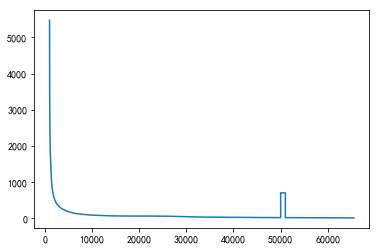

In [50]:
# ctd_part = ctd
# plt.plot()
plt.plot(ctd_part.groupby('next_click_dt').size().rolling(1000).mean())

In [111]:
del ctd;gc.collect()

555

rolling on ip,app,os,channel,day,hour by hour

In [8]:
trn_part = trn_df.head(10000)

In [12]:
trn_part.columns

Index(['app', 'app_cumcnt_ip_device_os', 'app_mean_target',
       'app_nunique_channel', 'app_nunique_ip', 'app_nunique_ip_device_os',
       'channel', 'channel_cnt_ip_app', 'channel_cnt_ip_day_hour',
       'channel_mean_target', 'channel_nunique_ip', 'click_id', 'click_time',
       'day', 'device', 'device_mean_target', 'hour', 'hour_mean_target',
       'hour_nunique_ip_day', 'ip', 'ip_mean_target', 'ip_nunique_channel',
       'is_attributed', 'next_click_dt', 'os', 'os_mean_target'],
      dtype='object')

In [11]:
gp = trn_part.groupby(['hour'])
trn_part['rolling_mean'] = gp.

59719842    0
59719843    0
59719844    0
59719845    0
59719846    0
59719847    0
59719848    0
59719849    0
59719850    0
59719851    0
Name: hour, dtype: uint8

- count shift by hour with (ip,day,hour)

In [11]:
trn_part = trn_df.sample(1000000)
trn_part.head()

,app,app_cumcnt_ip_device_os,app_mean_target,app_nunique_ip,app_nunique_ip_device_os,channel,channel_cnt_ip_app,channel_cnt_ip_day_hour,channel_mean_target,channel_nunique_ip,...,ip_mean_target,is_attributed,next_click_dt,os,device_cnt_ip_app_os_channel_day_hour,channel_cnt_ip_app_os,os_cumcnt_ip,hour_nunique_ip_day,os_nunique_ip_app,device_nunique_ip
93396503,8,169,0.001901,46,11,145,155,266,0.001675,104,...,0.001652,0.0,1,28,88,88,813,24,13,10
147235110,2,415,0.000241,52,30,236,184,36,0.000278,104,...,0.000689,0.0,2110,13,2,44,1342,22,20,11
128465989,64,28,0.000259,43,22,459,37,72,0.000197,112,...,0.000732,0.0,108,17,11,11,1960,23,10,5
6099772,3,807,0.000286,44,28,442,627,156,0.000336,99,...,0.001680,NaN,17912,13,1,206,2655,6,35,7
119820875,25,211,0.000065,46,27,259,34,90,0.000436,108,...,0.001461,0.0,0,13,6,24,1369,22,4,7


In [18]:
gp = trn_part.groupby(['ip','day','hour']).size().rename('ip_tcnt').reset_index()
gp['shift']= gp.groupby(['ip','day']).shift(1).ip_tcnt

In [20]:
gp.head()

,ip,day,hour,ip_tcnt,shift
0,3,10,21,1,NaN
1,6,8,8,1,NaN
2,6,8,12,2,1.0
3,6,8,13,1,2.0
4,6,8,16,1,1.0
